In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Business Case: Netflix - Data Exploration and Visualisation

Problem Statement:
            
            
            Netflix is one of the leading over the top streaming services that distributes Movies and TV Shows mainly. Exploratory data analysis of the given dataset was done on number of movies and tv shows from each country, according to genre, directors, rating, date released, date added and duration of the movies. With abundance of choices available to viewers with dozens of ott platforms coming into the market, this analysis helps in identifying the kind of movies and tv shows preference by the audience from different regions. this could help in planning the type and time of content that can be added to Netflix country wise to grow its business.

In [43]:
nf=pd.read_csv('netflix business case.csv')
nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [44]:
nf.shape    ###no of rows and columns

(8807, 12)

columns and their data type with non-null values count

In [45]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [46]:
nf.isnull().sum()   ##### Null_values count in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [47]:
##count of movies and shows
print('movies_count:',nf[nf['type']=='Movie']['title'].count())
print('tvshows_count:',nf[nf['type']=='TV Show']['title'].count())

movies_count: 6131
tvshows_count: 2676


The given data consisted of 6131 movies and 2676 TV Shows 

In [48]:
##range of release year
print(min(nf['release_year']),max(nf['release_year']))

1925 2021


Movies and TV Shows added to Netflix were released in between the year 1925 to 2021.

In [49]:
##range of netflix added_date
print('max:',max(nf[~nf['date_added'].isnull()]['date_added'].apply(lambda x:int(x[-4:]))))
print('min:',min(nf[~nf['date_added'].isnull()]['date_added'].apply(lambda x:int(x[-4:]))))

max: 2021
min: 2008


Movies and tv shows added to Netflix in between the year 2008 and 2021 were given in data.

In [50]:
l=list()
def func(x):
    l.extend([i.strip() for i in x.split(',')])
nf[~nf['country'].isnull()]['country'].apply(func)
l=list(set(l))
l.remove('') ##removing empty string in list
l.sort()  ###sorting lexicographically
nf_country=pd.DataFrame(l,columns=['country'])
nf_country

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
117,Vatican City
118,Venezuela
119,Vietnam
120,West Germany


After unnesting of the country column it was observed that there were a total of 122 countries listed

In [51]:
####creating a dataframe with unique countries from nf dataframe
l_c=list()
def func(x):
    l_c.extend([i.strip() for i in x.split(',')])
nf[(~nf['country'].isnull()) & (nf['type']=='Movie')]['country'].apply(func)
def func(x):
    return l_c.count(x)
nf_country['movies_count']=nf_country['country'].apply(func)
nf_country.set_index('country')['movies_count'].sort_values(ascending=False)

country
United States     2752
India              962
United Kingdom     534
Canada             319
France             303
                  ... 
Cuba                 0
Cyprus               0
Belarus              0
Azerbaijan           0
Puerto Rico          0
Name: movies_count, Length: 122, dtype: int64

Top 5 countries with highest number of movies streamed on Netflix were the United States(2752), 
India(962), the United Kingdom(534), Canada(319) and France(303).

In [52]:
l_c_t=list()
def func(x):
    l_c_t.extend([i.strip() for i in x.split(',')])
nf[(~nf['country'].isnull()) & (nf['type']=='TV Show')]['country'].apply(func)
def func(x):
    return l_c_t.count(x)
nf_country['TVshows_count']=nf_country['country'].apply(func)
nf_country.set_index('country')['TVshows_count'].sort_values(ascending=False)

country
United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
                 ... 
Kenya               0
Kazakhstan          0
Jamaica             0
Iraq                0
Zimbabwe            0
Name: TVshows_count, Length: 122, dtype: int64

Top 5 countries with highest number of tv shows streamed on Netflix were the United States(938), the United Kingdom(272), Japan(199), South Korea(170) and Canada(126).

In [53]:
###creating dataframe for genres
l=list()
def func(x):
    l.extend([i.strip() for i in x.split(',')])
nf['listed_in'].apply(func) ###there are no null values in listed_in
l=list(set(l))
l.sort()  ###sorting lexicographically
nf_genres=pd.DataFrame(l,columns=['genre'])
nf_genres

,genre
0,Action & Adventure
1,Anime Features
2,Anime Series
3,British TV Shows
4,Children & Family Movies
5,Classic & Cult TV
6,Classic Movies
7,Comedies
8,Crime TV Shows
9,Cult Movies


After unnesting of the genre column it was observed that there were a total of 42 genres of movies and TV shows

In [54]:
l_g_m=list()
def func(x):
    l_g_m.extend([i.strip() for i in x.split(',')])
nf[nf['type']=='Movie']['listed_in'].apply(func)
def func(x):
    return l_g_m.count(x)
nf_genres['movies_count']=nf_genres['genre'].apply(func)
nf_genres[~(nf_genres['movies_count']==0)].set_index('genre')['movies_count'].sort_values(ascending=False)

genre
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Cult Movies                   71
Anime Features                71
Faith & Spirituality          65
Movies                        57
Name: movies_count, dtype: int64

Most of the movies belonged to the genre of international movies(2752) and Dramas(2427) followed by Comedies(1674)

In [55]:
l_g_t=list()
def func(x):
    l_g_t.extend([i.strip() for i in x.split(',')])
nf[nf['type']=='TV Show']['listed_in'].apply(func)
def func(x):
    return l_g_t.count(x)
nf_genres['TVshows_count']=nf_genres['genre'].apply(func)
nf_genres[~(nf_genres['TVshows_count']==0)].set_index('genre')['TVshows_count'].sort_values(ascending=False)

genre
International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: TVshows_count, dtype: int64

Top 5 tv shows genres were International TV Shows(1351), TV Dramas(763), TV Comedies(581), Crime TV Shows(470) and Kids' TV(451).

In [56]:
l_d=list()
def func(x):
    l_d.extend([i.strip() for i in x.split(',')])
nf[~nf['director'].isnull()]['director'].apply(func)
l_d=list(set(l_d))
l_d.sort()  ###sorting lexicographically
nf_director=pd.DataFrame(l_d,columns=['director'])
nf_director

,director
0,A. L. Vijay
1,A. Raajdheep
2,A. Salaam
3,A.R. Murugadoss
4,Aadish Keluskar
...,...
4988,Éric Warin
4989,Ísold Uggadóttir
4990,Óskar Thór Axelsson
4991,Ömer Faruk Sorak


Unnesting of the director column showed that there were a total of 4993 directors.

In [57]:
l_d_m=list()
def func(x):
    l_d_m.extend([i.strip() for i in x.split(',')])
nf[(~nf['director'].isnull()) & (nf['type']=='Movie')]['director'].apply(func)
def func(x):
    return l_d_m.count(x)
nf_director['movies_count']=nf_director['director'].apply(func)
nf_director.set_index('director')['movies_count'].sort_values(ascending=False)

director
Rajiv Chilaka             22
Jan Suter                 21
Raúl Campos               19
Suhas Kadav               16
Jay Karas                 15
                          ..
Sakon Tiacharoen           0
Vignesh Shivan             0
Neslihan Yesilyurt         0
David Chuang               0
Javier Gómez Santander     0
Name: movies_count, Length: 4993, dtype: int64

Rajiv Chilaka(22) is the director with highest number of movies added to Netflix followed by Jan Suter(21), Raúl Campos(19), Suhas Kadav(16) and Jay Karas(15)

In [58]:
l_d_t=list()
def func(x):
    l_d_t.extend([i.strip() for i in x.split(',')])
nf[(~nf['director'].isnull()) & (nf['type']=='TV Show')]['director'].apply(func)
def func(x):
    return l_d_t.count(x)
nf_director['TVshows_count']=nf_director['director'].apply(func)
nf_director.set_index('director')['TVshows_count'].sort_values(ascending=False).head(20)

director
Alastair Fothergill      3
Ken Burns                3
Stan Lathan              2
Lynn Novick              2
Iginio Straffi           2
Jung-ah Im               2
Gautham Vasudev Menon    2
Hsu Fu-chun              2
Shin Won-ho              2
Joe Berlinger            2
Rob Seidenglanz          2
Miguel Conde             1
Michel Tikhomiroff       1
Spencer Williams         1
Srijit Mukherji          1
Mick Grogan              1
Stefano Lodovichi        1
Soumendra Padhi          1
Everardo Gout            1
Stefan Brogren           1
Name: TVshows_count, dtype: int64

In [59]:
#####creating dataframe with top10 countries movies_count and to each country movie genre is included
top10_countries_m=nf_country.set_index('country')['movies_count'].sort_values(ascending=False).head(10).index
top10movcountries=pd.DataFrame(top10_countries_m,columns=['country'])
movie_genres=nf_genres[~(nf_genres['movies_count']==0)]['genre']
movie_genres=pd.DataFrame(movie_genres,columns=['genre'])
movie_genres['key']=1
top10movcountries['key']=1
country_genre=top10movcountries.merge(movie_genres,on='key').drop('key',axis=1)
def func(x):
    nf_c=nf[(nf['country'].fillna('NA').str.contains(x['country'])) & (nf['type']=='Movie')]
    l_l=list()
    for i in nf_c['listed_in']:
        l_l.extend(j.strip() for j in i.split(','))
    return l_l.count(x['genre'])
country_genre['movies_count']=country_genre.apply(func,axis=1)
country_genre

,country,genre,movies_count
0,United States,Action & Adventure,404
1,United States,Anime Features,7
2,United States,Children & Family Movies,390
3,United States,Classic Movies,81
4,United States,Comedies,680
...,...,...,...
195,Mexico,Romantic Movies,8
196,Mexico,Sci-Fi & Fantasy,6
197,Mexico,Sports Movies,3
198,Mexico,Stand-Up Comedy,18


Genre wise distribution of top 10 countries with highest number of movies

In [60]:
###sorting movie genres in each country 
def func(x):
    return x.set_index('genre')['movies_count'].sort_values(ascending=False)
sort_country_genre_movies=country_genre.groupby('country').apply(func).reset_index()
sort_country_genre_movies

,country,genre,movies_count
0,Canada,Comedies,94
1,Canada,Dramas,82
2,Canada,Children & Family Movies,80
3,Canada,International Movies,60
4,Canada,Thrillers,49
...,...,...,...
195,United States,LGBTQ Movies,63
196,United States,Cult Movies,52
197,United States,Faith & Spirituality,42
198,United States,Movies,22


sorted genres in each of the top10 countries

In [61]:
date_added=nf[['type','title','date_added']]
date_added

,type,title,date_added
0,Movie,Dick Johnson Is Dead,"September 25, 2021"
1,TV Show,Blood & Water,"September 24, 2021"
2,TV Show,Ganglands,"September 24, 2021"
3,TV Show,Jailbirds New Orleans,"September 24, 2021"
4,TV Show,Kota Factory,"September 24, 2021"
...,...,...,...
8802,Movie,Zodiac,"November 20, 2019"
8803,TV Show,Zombie Dumb,"July 1, 2019"
8804,Movie,Zombieland,"November 1, 2019"
8805,Movie,Zoom,"January 11, 2020"


In [62]:
def func(x):
    return x[:-8].strip()
dl=date_added[date_added['type']=='TV Show']['date_added'].fillna('NA').apply(func)

In [63]:
dl.value_counts()

date_added
December     266
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
May          193
January      192
February     181
              10
Name: count, dtype: int64

Highest number of tv shows were added in the months of December and July

UNIVARIATE ANALYSIS:

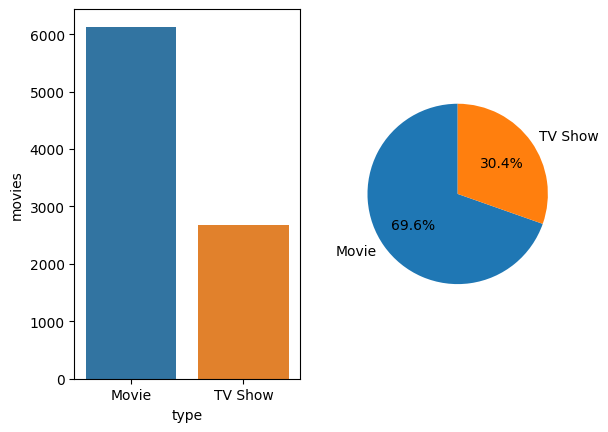

In [64]:
data=nf.groupby('type')['title'].count()
plt.subplot(1,2,1)
sns.countplot(data=nf,x='type')
plt.ylabel('movies')
plt.subplot(1,2,2)
plt.pie(data,labels=data.index,autopct='%1.1f%%',startangle=90)
plt.show()

Major contribution on Netflix streaming was by movies(69.6%).

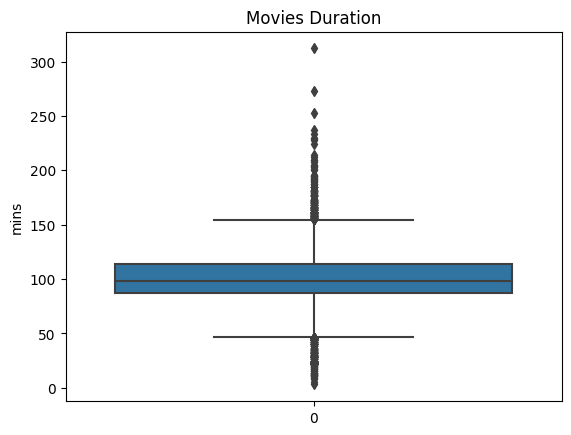

count    6131.000000
mean       99.576415
std        28.283691
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [65]:
avg=int(nf[(nf['type']=='Movie') & (~nf['duration'].isnull())]['duration'].str.strip(' min').astype('int').median())
durations=nf[nf['type']=='Movie']['duration'].fillna(str(avg)).str.strip('min').astype('int64')
sns.boxplot(durations)
plt.ylabel('mins')
plt.title('Movies Duration')
plt.show()
durations.describe()

Duration of movies ranged from a minimum of 3 minutes to a maximum of 312 minutes. Duration of 50% of movies was between 87 minutes to 114 minutes and median duration of the movies was 98 min.

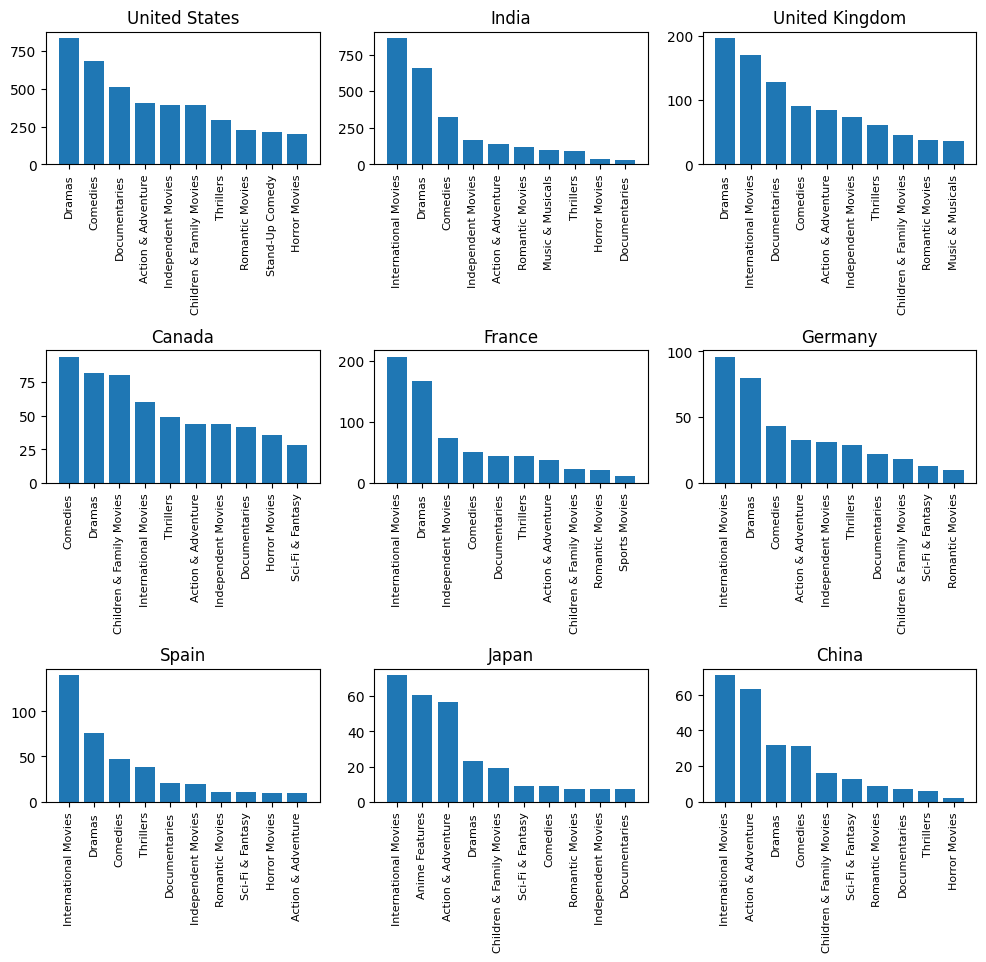

In [66]:
top10=nf_country.set_index('country')['movies_count'].sort_values(ascending=False).head(10).index
plt.figure(figsize=(12,10))
x=1
for i in top10[:9]:
    if x==4:
        x=7
    if x==10:
        x=13
    data=sort_country_genre_movies[sort_country_genre_movies['country']==i].head(10)
    data=data[['genre','movies_count']].set_index('genre')
    plt.subplot(5,3,x)
    plt.title(i)
    plt.bar(x=data.index,height=data['movies_count'])
    plt.xticks(rotation=90,size=8)
    x=x+1

The above graph depicts top 10 movie genres in each of the top 9 countries with highest number of movies. In the United States Dramas was the commonest genre followed by comedies and Documentaries where as in India International movies was the commonest genre followed by Dramas and Comedies.

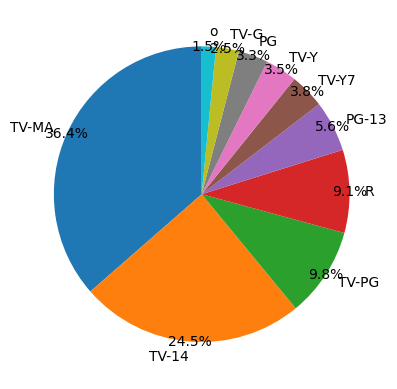

In [67]:
data=nf.groupby('rating')['title'].count().sort_values(ascending=False)
data['o']=sum(data[9:])
data=data.reset_index().drop(range(9,17))
plt.pie(data['title'],labels=data['rating'],autopct='%1.1f%%',startangle=90,pctdistance=1.0,labeldistance=1.1)
plt.show()

Nearly half of the movies and tv shows had Adult rating like TV-MA(36.4%) and R(9.1%). 30%(TV-14 and PG-13) of the movies and tv shows were for 13 years and above.

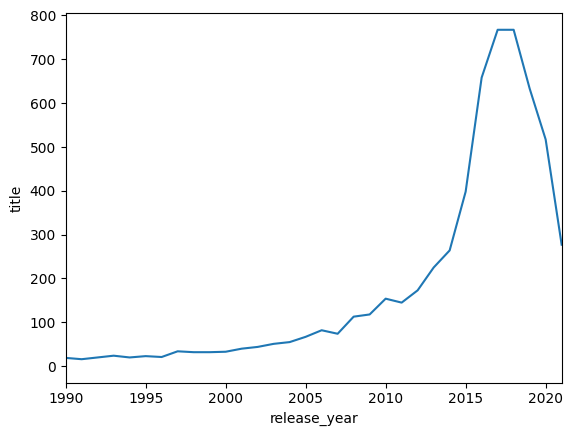

In [68]:
year_m=nf[(nf['type']=='Movie')].groupby('release_year')['title'].count()
sns.lineplot(data=year_m,x=year_m.index,y=year_m)
plt.xlim(1990,2021)
plt.show()

There is a growing trend in the release of movies from around the year 2011 with steep raise from the year 2015 till 2019. There is a sudden fall in the year 2020.

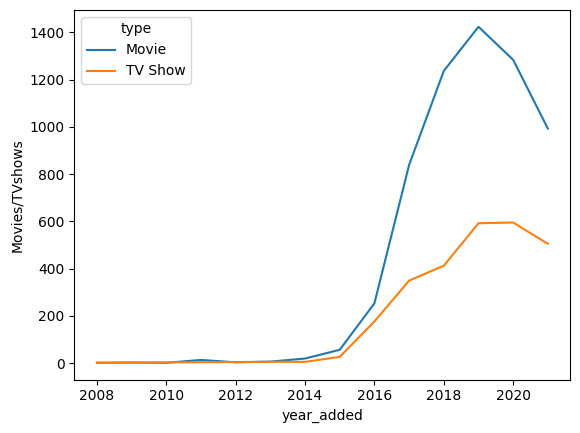

In [69]:
dit=nf[~nf['date_added'].isnull()][['type','date_added']]
def func(x):
    return int(x[-4:])
dit['year_added']=dit['date_added'].apply(func)
data=dit.groupby(['type','year_added'])['date_added'].count().reset_index()
sns.lineplot(data=data,x=data['year_added'],y=data['date_added'],hue=data['type'])
plt.ylabel('Movies/TVshows')
plt.show()

Lineplot showing comparision of trend in addition of movies and TV Shows on Netflix

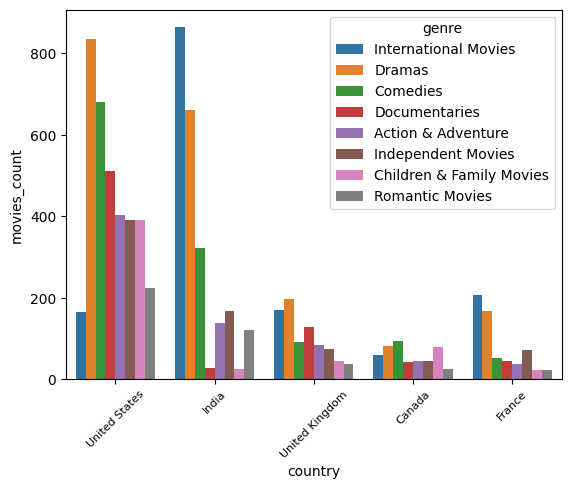

In [70]:
top5_genres=nf_genres.set_index('genre')['movies_count'].sort_values(ascending=False)[:8].index
def func(x):
    return x.set_index('genre').loc[top5_genres]
data=sort_country_genre_movies.groupby('country').apply(func).drop(['country'],axis=1).reset_index()
data=data.set_index('country').loc[top10[:5]]
sns.barplot(data=data,x=data.index,y='movies_count',hue='genre')
plt.xticks(rotation=45,size=8)
plt.show()

Barplot showing distribution of top 7 genres in top 5 countries with highest number of movies.

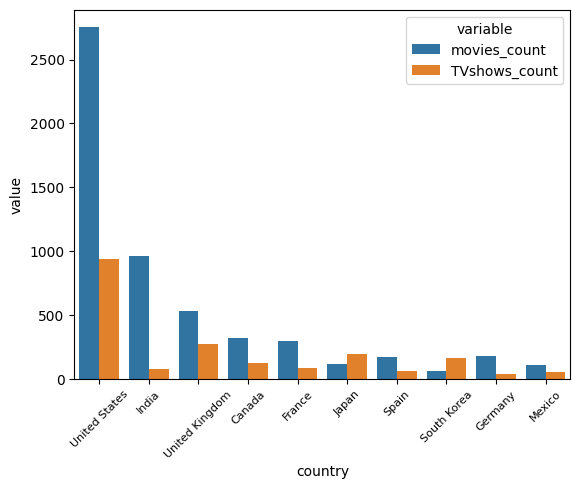

In [71]:
def func(x):
    return x['movies_count']+x['TVshows_count']
nf_country['total']=nf_country.apply(func,axis=1)
top10_c=nf_country.set_index('country')['total'].sort_values(ascending=False).index[:10]
nf_country.drop('total',axis=1,inplace=True)
data=pd.melt(nf_country,id_vars=['country']).set_index('country').loc[top10_c]
sns.barplot(data=data,x=data.index,y=data['value'],hue=data['variable'])
plt.xticks(rotation=45,size=8)
plt.show()

Count of movies and tvshows among the Top 10 countries with highest number of TVshows and movies.

In [72]:
def func(x):
    return x['movies_count']+x['TVshows_count']
nf_country['total']=nf_country.apply(func,axis=1)
top_c=nf_country.set_index('country')['total'].sort_values(ascending=False).index
nf_country.drop('total',axis=1,inplace=True)
Cou=pd.DataFrame(top_c,columns=['country'])
Rat=nf[~nf['rating'].isnull()]['rating'].unique()
Rat=pd.DataFrame(Rat,columns=['rating'])
Rat['key']=1
Cou['key']=1
Cou_Rat=Cou.merge(Rat,on='key').drop('key',axis=1)

In [73]:
def func(x):
    nx=nf[nf['country'].fillna('NA').str.contains(x['country'])]
    return (nx['rating']==x['rating']).sum()
Cou_Rat['count']=Cou_Rat.apply(func,axis=1)

In [74]:
Cou_Rat_H=Cou_Rat.pivot(index='country',columns='rating',values='count').loc[top_c[:20]]

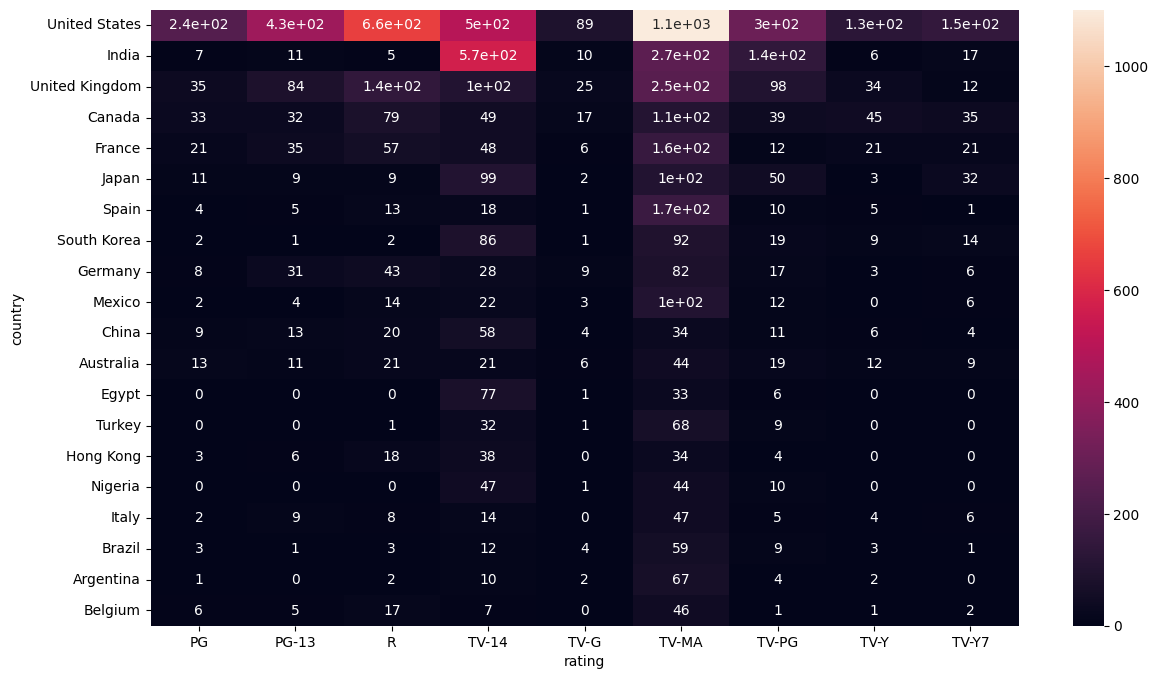

In [75]:
plt.figure(figsize=(14,8))
sns.heatmap(Cou_Rat_H.iloc[:,6:15],annot=True)
plt.show()

top20 countries with highest number of movies and tv shows and their rating

Business Insights:


        1.The proportion of movies and tv shows added on Netflix from the year 2008 to 2021 were 70% and 30% respectively

In [76]:
nf_country[nf_country['movies_count']<nf_country['TVshows_count']]

,country,movies_count,TVshows_count
8,Azerbaijan,0,1
11,Belarus,0,1
24,Colombia,20,32
26,Cuba,0,1
27,Cyprus,0,1
53,Japan,119,199
87,Puerto Rico,0,1
90,Russia,11,16
95,Singapore,18,23
100,South Korea,61,170


        2.Though movies were the major contributors in many countries, Some countries like colombia, japan, south korea etc., had more TV Shows than Movies.
        
        3.Genre preference of the viewers varied from country to country with some common genres in many countries.
        
        4.Majority of them were Adult related and above 13 years age group movies.
        
        5.Release year analysis of added movies showed drastic increase in the number of movies released in the last decade.
        
        6.There is a growing trend in the utilisation of OTT as the medium of entertainment.
        
        7.Countries like Japan, South Korea and Canada were in the top 10 list in both movies as well as TV Shows.
        
        8.Months like December and July were showing highest addition of TV Shows. This may be the vacation period in some countries.

Recomendations:


        1.As movies were the more prefered option than tv shows, proportion of movies and tv shows added to Netflix should be carefully planned accordingly.
        
        2.In countries with more preference to TV Shows than Movies, Major focus should be on addition of TV Shows. 
        
        3.Though OTT is being used in many countries major countributors were only a few countries.More business focus should be mainly in these countries with gradual expansion to other countries.Subtitle provision in the local language of the country may help to gather more subcribers.
        
        4.Addition of movies and shows should be based on viewer prefered genre in each country. For example Dramas, Comedies and International movies genre were common in many countries. In Canada children & family genre was one of the prefered genre where as in many other countries less prefered.
        
        5.More focus should be on adult related and above 13 years age group movies and shows as this group are the major viewers.
        
        6.Growing trend of entertainment business including OTT gives us the future projections to plan to invest and expand its business.
        
        7.Selection of the time of content addition to the platform is also crucial to get more subscribers.